In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

In [4]:
mnist = fetch_openml('mnist_784')

/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
x, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()

label:  2


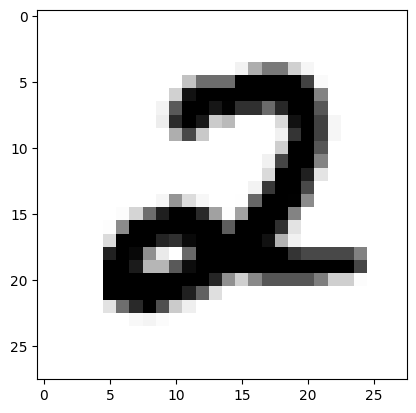

In [26]:
# 28*28 的图片
pic_idx = 4599
random_digit = x[pic_idx]
some_random_digit = random_digit.reshape(28, 28)
plt.imshow(some_random_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
print('label: ', y[pic_idx])

In [10]:
x_train, x_test = x[:6000], x[6000: 7000]  
y_train, y_test = y[:6000], y[6000: 7000]

In [11]:
# shuffle 一下数据集
shffule_index = np.random.permutation(6000)
shffule_index

array([ 118, 3244, 1552, ..., 3003, 3779, 4495])

In [12]:
x_train, y_train = x_train[shffule_index], y_train[shffule_index]

In [27]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [14]:
y_train_2

array([False,  True, False, ..., False, False, False])

In [15]:
# 使用逻辑回归分类器来进行分类任务
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol = 0.1)

In [31]:
# 为 2的时候，结果是True，不是2的话，结果就是False
clf.fit(x_train, y_train_2)

/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [32]:
y_pred = clf.predict([random_digit])

In [34]:
y_pred

array([ True])

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
a.mean()

/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

0.9535

In [39]:
# 使用svm 支持向量机，来分类
from sklearn import svm
clf_s = svm.SVC()
clf_s.fit(x_train, y_train_2)
res = clf_s.predict([random_digit])
res

array([ True])

In [40]:
score = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
score

/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fredric/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

array([0.9575, 0.9515, 0.9515])